In [11]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost as xgb
import math
from ml_metrics import rmsle
from sklearn.model_selection import train_test_split

In [10]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [21]:
# We take all float/int columns except for ID, timestamp, and the target value
train_columns = list(
    set(df_train.select_dtypes(include=['float64', 'int64']).columns) - set(['id', 'timestamp', 'price_doc']))

train_labels = df_train['price_doc'].values
train_feats = df_train[train_columns].values
test_feats = df_test[train_columns].values

In [22]:
split = 25000
x_train, x_valid, y_train, y_valid = train_test_split(train_feats, train_labels)

In [28]:
d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_f_train = xgb.DMatrix(train_feats, label=train_labels)

In [43]:
def evals(preds, dtrain):
    labels = dtrain.get_label()
    assert len(preds) == len(labels)
    labels = labels.tolist()
    preds = preds.tolist()
    terms_to_sum = [(math.log(labels[i] + 1) - math.log(max(0, preds[i]) + 1)) ** 2.0 for i, pred in enumerate(labels)]
    return 'rmsle', (sum(terms_to_sum) * (1.0 / len(preds))) ** 0.5

In [44]:
params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

watchlist = [(d_train, 'train'), (d_valid, 'valid')]
clf = xgb.train(params, d_train, 800, watchlist, feval=evals,  early_stopping_rounds=100)

[0]	train-rmse:8.43473e+06	valid-rmse:8.40465e+06	train-rmsle:3.86216	valid-rmsle:3.87075
Multiple eval metrics have been passed: 'valid-rmsle' will be used for early stopping.

Will train until valid-rmsle hasn't improved in 100 rounds.
[1]	train-rmse:8.28639e+06	valid-rmse:8.25939e+06	train-rmsle:3.18448	valid-rmsle:3.19346
[2]	train-rmse:8.14117e+06	valid-rmse:8.11902e+06	train-rmsle:2.79362	valid-rmsle:2.80178
[3]	train-rmse:7.99922e+06	valid-rmse:7.98219e+06	train-rmsle:2.52006	valid-rmsle:2.52824
[4]	train-rmse:7.86023e+06	valid-rmse:7.84813e+06	train-rmsle:2.31035	valid-rmsle:2.31825
[5]	train-rmse:7.72443e+06	valid-rmse:7.71734e+06	train-rmsle:2.14183	valid-rmsle:2.14977
[6]	train-rmse:7.59102e+06	valid-rmse:7.58664e+06	train-rmsle:2.00073	valid-rmsle:2.0087
[7]	train-rmse:7.46051e+06	valid-rmse:7.46164e+06	train-rmsle:1.88049	valid-rmsle:1.88854
[8]	train-rmse:7.33348e+06	valid-rmse:7.33865e+06	train-rmsle:1.77618	valid-rmsle:1.78405
[9]	train-rmse:7.20895e+06	valid-rmse:7.218

[88]	train-rmse:2.75996e+06	valid-rmse:3.15411e+06	train-rmsle:0.470824	valid-rmsle:0.481288
[89]	train-rmse:2.7422e+06	valid-rmse:3.1408e+06	train-rmsle:0.469902	valid-rmsle:0.480416
[90]	train-rmse:2.72458e+06	valid-rmse:3.12875e+06	train-rmsle:0.469002	valid-rmsle:0.479559
[91]	train-rmse:2.70723e+06	valid-rmse:3.11591e+06	train-rmsle:0.468122	valid-rmsle:0.47873
[92]	train-rmse:2.6906e+06	valid-rmse:3.10435e+06	train-rmsle:0.467357	valid-rmsle:0.477965
[93]	train-rmse:2.67421e+06	valid-rmse:3.09057e+06	train-rmsle:0.466585	valid-rmsle:0.477265
[94]	train-rmse:2.65866e+06	valid-rmse:3.07809e+06	train-rmsle:0.465787	valid-rmsle:0.476543
[95]	train-rmse:2.64291e+06	valid-rmse:3.06742e+06	train-rmsle:0.465112	valid-rmsle:0.47594
[96]	train-rmse:2.62809e+06	valid-rmse:3.05789e+06	train-rmsle:0.464489	valid-rmsle:0.475368
[97]	train-rmse:2.61378e+06	valid-rmse:3.04705e+06	train-rmsle:0.463797	valid-rmsle:0.474757
[98]	train-rmse:2.59914e+06	valid-rmse:3.03468e+06	train-rmsle:0.463247	val

[176]	train-rmse:2.11073e+06	valid-rmse:2.73694e+06	train-rmsle:0.452931	valid-rmsle:0.468359
[177]	train-rmse:2.10846e+06	valid-rmse:2.73616e+06	train-rmsle:0.452901	valid-rmsle:0.468364
[178]	train-rmse:2.10653e+06	valid-rmse:2.7347e+06	train-rmsle:0.452882	valid-rmsle:0.468391
[179]	train-rmse:2.1042e+06	valid-rmse:2.73268e+06	train-rmsle:0.452873	valid-rmsle:0.468401
[180]	train-rmse:2.10185e+06	valid-rmse:2.73171e+06	train-rmsle:0.452814	valid-rmsle:0.468436
[181]	train-rmse:2.10021e+06	valid-rmse:2.73048e+06	train-rmsle:0.452797	valid-rmsle:0.468451
[182]	train-rmse:2.09748e+06	valid-rmse:2.7296e+06	train-rmsle:0.452741	valid-rmsle:0.468462
[183]	train-rmse:2.09515e+06	valid-rmse:2.72812e+06	train-rmsle:0.452681	valid-rmsle:0.468468
[184]	train-rmse:2.09324e+06	valid-rmse:2.72729e+06	train-rmsle:0.452651	valid-rmsle:0.46848
[185]	train-rmse:2.09036e+06	valid-rmse:2.72644e+06	train-rmsle:0.452588	valid-rmsle:0.468485
[186]	train-rmse:2.08823e+06	valid-rmse:2.72462e+06	train-rmsle:

In [50]:
preds = clf.predict(xgb.DMatrix(x_train))
print(qweeqw(y_train, preds))

0.449091839812


In [51]:
params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

watchlist = [(d_train, 'train'), (d_valid, 'valid')]
clf = xgb.train(params, d_f_train, 800, watchlist, feval=evals, early_stopping_rounds=100)

[0]	train-rmse:8.21698e+06	valid-rmse:8.18193e+06	train-rmsle:2.95092	valid-rmsle:2.95759
Multiple eval metrics have been passed: 'valid-rmsle' will be used for early stopping.

Will train until valid-rmsle hasn't improved in 100 rounds.
[1]	train-rmse:7.86404e+06	valid-rmse:7.83594e+06	train-rmsle:2.29184	valid-rmsle:2.29844
[2]	train-rmse:7.52897e+06	valid-rmse:7.50573e+06	train-rmsle:1.92083	valid-rmsle:1.92715
[3]	train-rmse:7.21518e+06	valid-rmse:7.19258e+06	train-rmsle:1.66731	valid-rmsle:1.67332
[4]	train-rmse:6.91812e+06	valid-rmse:6.89824e+06	train-rmsle:1.47777	valid-rmsle:1.48348
[5]	train-rmse:6.63619e+06	valid-rmse:6.6159e+06	train-rmsle:1.32884	valid-rmsle:1.33429
[6]	train-rmse:6.371e+06	valid-rmse:6.35099e+06	train-rmsle:1.20876	valid-rmsle:1.21389
[7]	train-rmse:6.12174e+06	valid-rmse:6.10107e+06	train-rmsle:1.10919	valid-rmsle:1.11375
[8]	train-rmse:5.89361e+06	valid-rmse:5.86971e+06	train-rmsle:1.02258	valid-rmsle:1.02692
[9]	train-rmse:5.67455e+06	valid-rmse:5.65063

[88]	train-rmse:2.31308e+06	valid-rmse:2.24873e+06	train-rmsle:0.466596	valid-rmsle:0.461255
[89]	train-rmse:2.30826e+06	valid-rmse:2.24544e+06	train-rmsle:0.466488	valid-rmsle:0.461183
[90]	train-rmse:2.30559e+06	valid-rmse:2.24388e+06	train-rmsle:0.466518	valid-rmsle:0.461239
[91]	train-rmse:2.30347e+06	valid-rmse:2.24093e+06	train-rmsle:0.466514	valid-rmsle:0.461208
[92]	train-rmse:2.29919e+06	valid-rmse:2.23746e+06	train-rmsle:0.466435	valid-rmsle:0.461179
[93]	train-rmse:2.29529e+06	valid-rmse:2.23341e+06	train-rmsle:0.466363	valid-rmsle:0.461081
[94]	train-rmse:2.29179e+06	valid-rmse:2.23089e+06	train-rmsle:0.466246	valid-rmsle:0.46103
[95]	train-rmse:2.28863e+06	valid-rmse:2.22764e+06	train-rmsle:0.46604	valid-rmsle:0.460823
[96]	train-rmse:2.2848e+06	valid-rmse:2.22442e+06	train-rmsle:0.465875	valid-rmsle:0.460688
[97]	train-rmse:2.2834e+06	valid-rmse:2.22365e+06	train-rmsle:0.465896	valid-rmsle:0.460704
[98]	train-rmse:2.28124e+06	valid-rmse:2.22102e+06	train-rmsle:0.465837	va

[176]	train-rmse:2.11929e+06	valid-rmse:2.08092e+06	train-rmsle:0.457425	valid-rmsle:0.452243
[177]	train-rmse:2.11807e+06	valid-rmse:2.07972e+06	train-rmsle:0.457327	valid-rmsle:0.452129
[178]	train-rmse:2.11556e+06	valid-rmse:2.07749e+06	train-rmsle:0.457088	valid-rmsle:0.451989
[179]	train-rmse:2.11492e+06	valid-rmse:2.07699e+06	train-rmsle:0.457031	valid-rmsle:0.451931
[180]	train-rmse:2.11391e+06	valid-rmse:2.07661e+06	train-rmsle:0.456956	valid-rmsle:0.451895
[181]	train-rmse:2.11242e+06	valid-rmse:2.07507e+06	train-rmsle:0.456857	valid-rmsle:0.451784
[182]	train-rmse:2.11125e+06	valid-rmse:2.0737e+06	train-rmsle:0.45678	valid-rmsle:0.451694
[183]	train-rmse:2.11089e+06	valid-rmse:2.07331e+06	train-rmsle:0.456749	valid-rmsle:0.451648
[184]	train-rmse:2.108e+06	valid-rmse:2.07237e+06	train-rmsle:0.456627	valid-rmsle:0.451537
[185]	train-rmse:2.10531e+06	valid-rmse:2.07124e+06	train-rmsle:0.456524	valid-rmsle:0.451397
[186]	train-rmse:2.10334e+06	valid-rmse:2.06995e+06	train-rmsle:

[264]	train-rmse:2.01552e+06	valid-rmse:1.99525e+06	train-rmsle:0.460846	valid-rmsle:0.44499
[265]	train-rmse:2.01441e+06	valid-rmse:1.99316e+06	train-rmsle:0.460743	valid-rmsle:0.444817
[266]	train-rmse:2.01371e+06	valid-rmse:1.99269e+06	train-rmsle:0.460683	valid-rmsle:0.444744
[267]	train-rmse:2.01335e+06	valid-rmse:1.99207e+06	train-rmsle:0.460649	valid-rmsle:0.444695
[268]	train-rmse:2.01075e+06	valid-rmse:1.99101e+06	train-rmsle:0.46052	valid-rmsle:0.444627
[269]	train-rmse:2.00852e+06	valid-rmse:1.98951e+06	train-rmsle:0.460322	valid-rmsle:0.444487
[270]	train-rmse:2.00743e+06	valid-rmse:1.98861e+06	train-rmsle:0.460287	valid-rmsle:0.444436
[271]	train-rmse:2.00694e+06	valid-rmse:1.9879e+06	train-rmsle:0.460256	valid-rmsle:0.444357
[272]	train-rmse:2.00552e+06	valid-rmse:1.98643e+06	train-rmsle:0.460096	valid-rmsle:0.444192
[273]	train-rmse:2.00491e+06	valid-rmse:1.98594e+06	train-rmsle:0.460021	valid-rmsle:0.444142
[274]	train-rmse:2.00396e+06	valid-rmse:1.98454e+06	train-rmsle

[352]	train-rmse:1.93148e+06	valid-rmse:1.92211e+06	train-rmsle:0.454291	valid-rmsle:0.438534
[353]	train-rmse:1.92948e+06	valid-rmse:1.92073e+06	train-rmsle:0.454143	valid-rmsle:0.438407
[354]	train-rmse:1.92892e+06	valid-rmse:1.9202e+06	train-rmsle:0.454096	valid-rmsle:0.438383
[355]	train-rmse:1.92779e+06	valid-rmse:1.91893e+06	train-rmsle:0.454012	valid-rmsle:0.438323
[356]	train-rmse:1.92713e+06	valid-rmse:1.91749e+06	train-rmsle:0.453924	valid-rmsle:0.438214
[357]	train-rmse:1.9264e+06	valid-rmse:1.91696e+06	train-rmsle:0.453916	valid-rmsle:0.43821
[358]	train-rmse:1.92577e+06	valid-rmse:1.91613e+06	train-rmsle:0.453847	valid-rmsle:0.438135
[359]	train-rmse:1.92487e+06	valid-rmse:1.91484e+06	train-rmsle:0.45378	valid-rmsle:0.43808
[360]	train-rmse:1.92459e+06	valid-rmse:1.91464e+06	train-rmsle:0.453776	valid-rmsle:0.43807
[361]	train-rmse:1.92335e+06	valid-rmse:1.91409e+06	train-rmsle:0.453655	valid-rmsle:0.437966
[362]	train-rmse:1.92198e+06	valid-rmse:1.91338e+06	train-rmsle:0.

[440]	train-rmse:1.85704e+06	valid-rmse:1.85565e+06	train-rmsle:0.447421	valid-rmsle:0.431799
[441]	train-rmse:1.85609e+06	valid-rmse:1.85487e+06	train-rmsle:0.447345	valid-rmsle:0.431729
[442]	train-rmse:1.85506e+06	valid-rmse:1.85364e+06	train-rmsle:0.447237	valid-rmsle:0.431625
[443]	train-rmse:1.8547e+06	valid-rmse:1.85323e+06	train-rmsle:0.447204	valid-rmsle:0.431577
[444]	train-rmse:1.85416e+06	valid-rmse:1.85273e+06	train-rmsle:0.447133	valid-rmsle:0.431511
[445]	train-rmse:1.85297e+06	valid-rmse:1.85189e+06	train-rmsle:0.446995	valid-rmsle:0.431434
[446]	train-rmse:1.85249e+06	valid-rmse:1.85149e+06	train-rmsle:0.446969	valid-rmsle:0.431397
[447]	train-rmse:1.85153e+06	valid-rmse:1.85075e+06	train-rmsle:0.446815	valid-rmsle:0.431332
[448]	train-rmse:1.85087e+06	valid-rmse:1.85057e+06	train-rmsle:0.446763	valid-rmsle:0.431321
[449]	train-rmse:1.85034e+06	valid-rmse:1.85008e+06	train-rmsle:0.446684	valid-rmsle:0.431236
[450]	train-rmse:1.84933e+06	valid-rmse:1.84939e+06	train-rms

[528]	train-rmse:1.79518e+06	valid-rmse:1.78954e+06	train-rmsle:0.440961	valid-rmsle:0.424441
[529]	train-rmse:1.79474e+06	valid-rmse:1.78919e+06	train-rmsle:0.440903	valid-rmsle:0.424389
[530]	train-rmse:1.7946e+06	valid-rmse:1.78893e+06	train-rmsle:0.440878	valid-rmsle:0.424335
[531]	train-rmse:1.79383e+06	valid-rmse:1.78842e+06	train-rmsle:0.440796	valid-rmsle:0.424271
[532]	train-rmse:1.7931e+06	valid-rmse:1.78783e+06	train-rmsle:0.440707	valid-rmsle:0.424223
[533]	train-rmse:1.79232e+06	valid-rmse:1.78708e+06	train-rmsle:0.440596	valid-rmsle:0.424123
[534]	train-rmse:1.79177e+06	valid-rmse:1.78665e+06	train-rmsle:0.440556	valid-rmsle:0.424056
[535]	train-rmse:1.79164e+06	valid-rmse:1.786e+06	train-rmsle:0.440564	valid-rmsle:0.424009
[536]	train-rmse:1.79093e+06	valid-rmse:1.78563e+06	train-rmsle:0.440501	valid-rmsle:0.423957
[537]	train-rmse:1.79079e+06	valid-rmse:1.7855e+06	train-rmsle:0.440494	valid-rmsle:0.423952
[538]	train-rmse:1.79017e+06	valid-rmse:1.78512e+06	train-rmsle:0

[616]	train-rmse:1.7415e+06	valid-rmse:1.74001e+06	train-rmsle:0.43493	valid-rmsle:0.41908
[617]	train-rmse:1.74032e+06	valid-rmse:1.73955e+06	train-rmsle:0.434834	valid-rmsle:0.419022
[618]	train-rmse:1.73952e+06	valid-rmse:1.73902e+06	train-rmsle:0.434663	valid-rmsle:0.418911
[619]	train-rmse:1.73867e+06	valid-rmse:1.73843e+06	train-rmsle:0.434564	valid-rmsle:0.418837
[620]	train-rmse:1.73818e+06	valid-rmse:1.73821e+06	train-rmsle:0.434508	valid-rmsle:0.418807
[621]	train-rmse:1.73794e+06	valid-rmse:1.73739e+06	train-rmsle:0.43449	valid-rmsle:0.418741
[622]	train-rmse:1.73748e+06	valid-rmse:1.73676e+06	train-rmsle:0.434416	valid-rmsle:0.418618
[623]	train-rmse:1.73681e+06	valid-rmse:1.73648e+06	train-rmsle:0.434335	valid-rmsle:0.41858
[624]	train-rmse:1.73632e+06	valid-rmse:1.736e+06	train-rmsle:0.434244	valid-rmsle:0.418506
[625]	train-rmse:1.7358e+06	valid-rmse:1.73581e+06	train-rmsle:0.434168	valid-rmsle:0.418459
[626]	train-rmse:1.7354e+06	valid-rmse:1.73529e+06	train-rmsle:0.434

[704]	train-rmse:1.68752e+06	valid-rmse:1.68847e+06	train-rmsle:0.428073	valid-rmsle:0.412021
[705]	train-rmse:1.68661e+06	valid-rmse:1.68766e+06	train-rmsle:0.427973	valid-rmsle:0.411895
[706]	train-rmse:1.68599e+06	valid-rmse:1.68714e+06	train-rmsle:0.427928	valid-rmsle:0.411825
[707]	train-rmse:1.68528e+06	valid-rmse:1.68646e+06	train-rmsle:0.427834	valid-rmsle:0.411733
[708]	train-rmse:1.68468e+06	valid-rmse:1.68603e+06	train-rmsle:0.427749	valid-rmsle:0.41165
[709]	train-rmse:1.68399e+06	valid-rmse:1.68547e+06	train-rmsle:0.427655	valid-rmsle:0.411598
[710]	train-rmse:1.68339e+06	valid-rmse:1.68446e+06	train-rmsle:0.427603	valid-rmsle:0.41151
[711]	train-rmse:1.68247e+06	valid-rmse:1.6831e+06	train-rmsle:0.427458	valid-rmsle:0.411287
[712]	train-rmse:1.68195e+06	valid-rmse:1.68277e+06	train-rmsle:0.427372	valid-rmsle:0.411256
[713]	train-rmse:1.6811e+06	valid-rmse:1.68167e+06	train-rmsle:0.427302	valid-rmsle:0.411191
[714]	train-rmse:1.68077e+06	valid-rmse:1.68132e+06	train-rmsle:

[792]	train-rmse:1.63851e+06	valid-rmse:1.64244e+06	train-rmsle:0.421828	valid-rmsle:0.405968
[793]	train-rmse:1.63799e+06	valid-rmse:1.64194e+06	train-rmsle:0.421729	valid-rmsle:0.405894
[794]	train-rmse:1.63753e+06	valid-rmse:1.64141e+06	train-rmsle:0.421659	valid-rmsle:0.405825
[795]	train-rmse:1.63741e+06	valid-rmse:1.64108e+06	train-rmsle:0.42165	valid-rmsle:0.405786
[796]	train-rmse:1.63699e+06	valid-rmse:1.6412e+06	train-rmsle:0.421594	valid-rmsle:0.405777
[797]	train-rmse:1.63664e+06	valid-rmse:1.6404e+06	train-rmsle:0.421564	valid-rmsle:0.40573
[798]	train-rmse:1.63605e+06	valid-rmse:1.63979e+06	train-rmsle:0.421455	valid-rmsle:0.405599
[799]	train-rmse:1.63549e+06	valid-rmse:1.63946e+06	train-rmsle:0.421345	valid-rmsle:0.405531


In [53]:
preds = clf.predict(d_f_train)

In [49]:
train_labels.shape

(30471,)

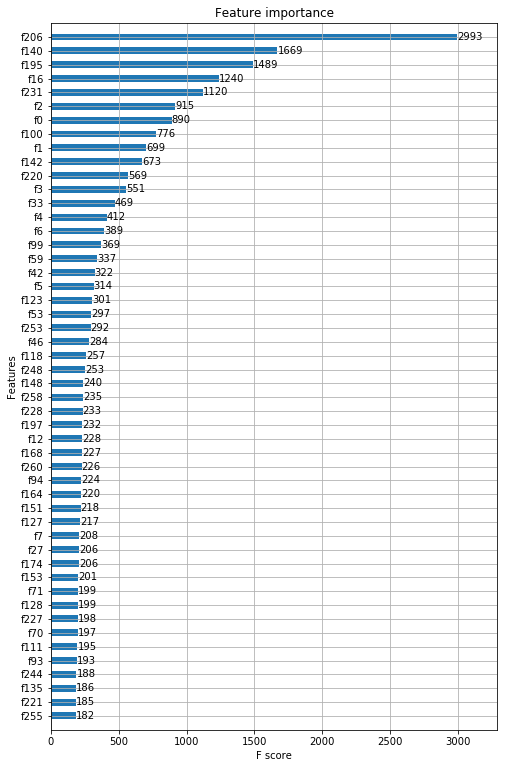

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(8, 13))
xgb.plot_importance(clf, max_num_features=50, height=0.5, ax=ax)

In [ ]:
p_test = clf.predict(xgb.DMatrix(x_test))
sub = pd.DataFrame()
sub['id'] = df_test['id'].values
sub['price_doc'] = p_test
sub.to_csv('xgb.csv', index=False)